In [111]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, det_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv("datasets/fake-real-users-insta/user_fake_authentic_4class.csv")

In [80]:
df

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,69,541,440,293,1,0,223,0.000000,0.111,10.120000,0.50,0.944,0.556,0.0,0.0,0.107055,334.596802,r
1,9,783,803,76,1,0,101,0.000000,0.000,19.820000,1.99,0.889,0.222,0.0,0.0,0.007400,2137.979248,r
2,390,1200,925,103,1,0,723,0.000000,0.000,11.540000,0.76,1.000,2.389,0.0,0.0,0.221954,96.244957,r
3,138,1100,1000,40,1,0,24,0.166667,0.167,20.440001,1.61,0.833,0.111,0.0,0.0,0.025055,226.622437,r
4,1,228,487,84,1,0,30,0.000000,0.000,9.210000,1.75,1.000,0.000,0.0,0.0,0.000000,0.000000,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43302,34,421,705,0,1,0,0,1.000000,0.333,13.130000,0.01,0.000,0.000,0.0,0.0,1.000000,293.514740,a
43303,3,26,124,0,1,0,0,1.000000,0.000,20.510000,1.28,0.667,0.000,0.0,0.0,1.000000,3049.940186,i
43304,10,323,1500,0,1,0,0,1.000000,0.100,4.020000,0.15,0.000,0.000,0.0,0.0,1.000000,89.871666,i
43305,3,317,1000,0,1,0,12,0.333333,0.333,13.880000,0.63,0.333,0.000,0.0,0.0,0.000000,9.767870,i


In [81]:
df.describe()

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi
count,43307.000000,4.330700e+04,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000,43307.000000
mean,152.551851,8.274772e+02,2817.928210,46.263260,0.932644,0.142448,120.867897,0.291397,0.184412,20.404906,1.117321,0.169090,0.449444,0.044044,0.064475,0.348074,442.005725
std,701.720040,1.250388e+04,2806.099606,60.603408,0.250641,0.349513,212.129187,0.356736,0.258915,146.742244,6.802049,0.280428,1.201003,0.266913,0.624448,0.376860,875.626043
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.070000e+02,483.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.950000,0.050000,0.000000,0.000000,0.000000,0.000000,0.039165,9.990695
50%,22.000000,2.890000e+02,1400.000000,13.000000,1.000000,0.000000,30.000000,0.111111,0.056000,7.850000,0.320000,0.000000,0.000000,0.000000,0.000000,0.166252,146.030853
75%,102.000000,7.125000e+02,6100.000000,85.000000,1.000000,0.000000,133.000000,0.529412,0.278000,17.990000,0.950000,0.231000,0.444000,0.000000,0.000000,0.654545,517.563293
max,76200.000000,1.900000e+06,7800.000000,555.000000,1.000000,1.000000,3274.000000,1.000000,1.000000,26650.000000,1009.090027,1.000000,30.000000,20.000000,58.000000,1.000000,26786.134770


In [82]:
df.isnull().sum()

pos      0
flw      0
flg      0
bl       0
pic      0
lin      0
cl       0
cz       0
ni       0
erl      0
erc      0
lt       0
hc       0
pr       0
fo       0
cs       0
pi       0
class    0
dtype: int64

In [83]:
df.dtypes

pos        int64
flw        int64
flg        int64
bl         int64
pic        int64
lin        int64
cl         int64
cz       float64
ni       float64
erl      float64
erc      float64
lt       float64
hc       float64
pr       float64
fo       float64
cs       float64
pi       float64
class     object
dtype: object

In [84]:
print("Clase class antes de label encoding \n", df["class"])
df['class'] = df['class'].astype('category').cat.codes
print("Clase class despues de label encoding \n",df["class"])

Clase class antes de label encoding 
 0        r
1        r
2        r
3        r
4        r
        ..
43302    a
43303    i
43304    i
43305    i
43306    s
Name: class, Length: 43307, dtype: object
Clase class despues de label encoding 
 0        2
1        2
2        2
3        2
4        2
        ..
43302    0
43303    1
43304    1
43305    1
43306    3
Name: class, Length: 43307, dtype: int8


In [85]:
df['class'].values.sum()

62220

In [86]:
print(df['class'].unique())


[2 3 1 0]


array([[<Axes: title={'center': 'pos'}>, <Axes: title={'center': 'flw'}>,
        <Axes: title={'center': 'flg'}>, <Axes: title={'center': 'bl'}>],
       [<Axes: title={'center': 'pic'}>, <Axes: title={'center': 'lin'}>,
        <Axes: title={'center': 'cl'}>, <Axes: title={'center': 'cz'}>],
       [<Axes: title={'center': 'ni'}>, <Axes: title={'center': 'erl'}>,
        <Axes: title={'center': 'erc'}>, <Axes: title={'center': 'lt'}>],
       [<Axes: title={'center': 'hc'}>, <Axes: title={'center': 'pr'}>,
        <Axes: title={'center': 'fo'}>, <Axes: title={'center': 'cs'}>],
       [<Axes: title={'center': 'pi'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

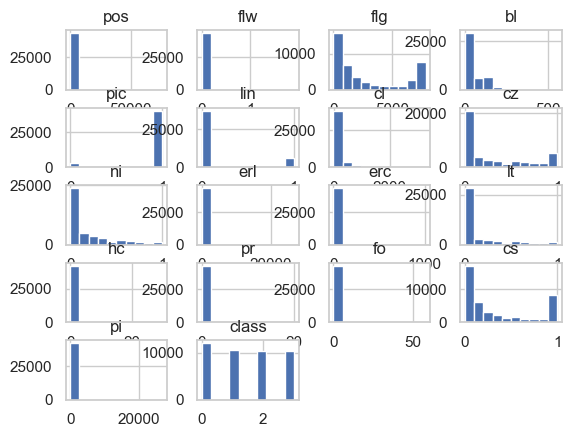

In [87]:
df.hist()

In [99]:
# Instanciar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a todas las columnas
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

array([[<Axes: title={'center': 'pos'}>, <Axes: title={'center': 'flw'}>,
        <Axes: title={'center': 'flg'}>, <Axes: title={'center': 'bl'}>],
       [<Axes: title={'center': 'pic'}>, <Axes: title={'center': 'lin'}>,
        <Axes: title={'center': 'cl'}>, <Axes: title={'center': 'cz'}>],
       [<Axes: title={'center': 'ni'}>, <Axes: title={'center': 'erl'}>,
        <Axes: title={'center': 'erc'}>, <Axes: title={'center': 'lt'}>],
       [<Axes: title={'center': 'hc'}>, <Axes: title={'center': 'pr'}>,
        <Axes: title={'center': 'fo'}>, <Axes: title={'center': 'cs'}>],
       [<Axes: title={'center': 'pi'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

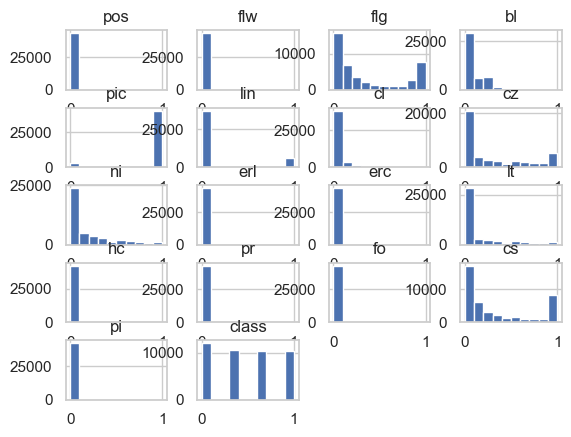

In [89]:
df_normalized.hist()

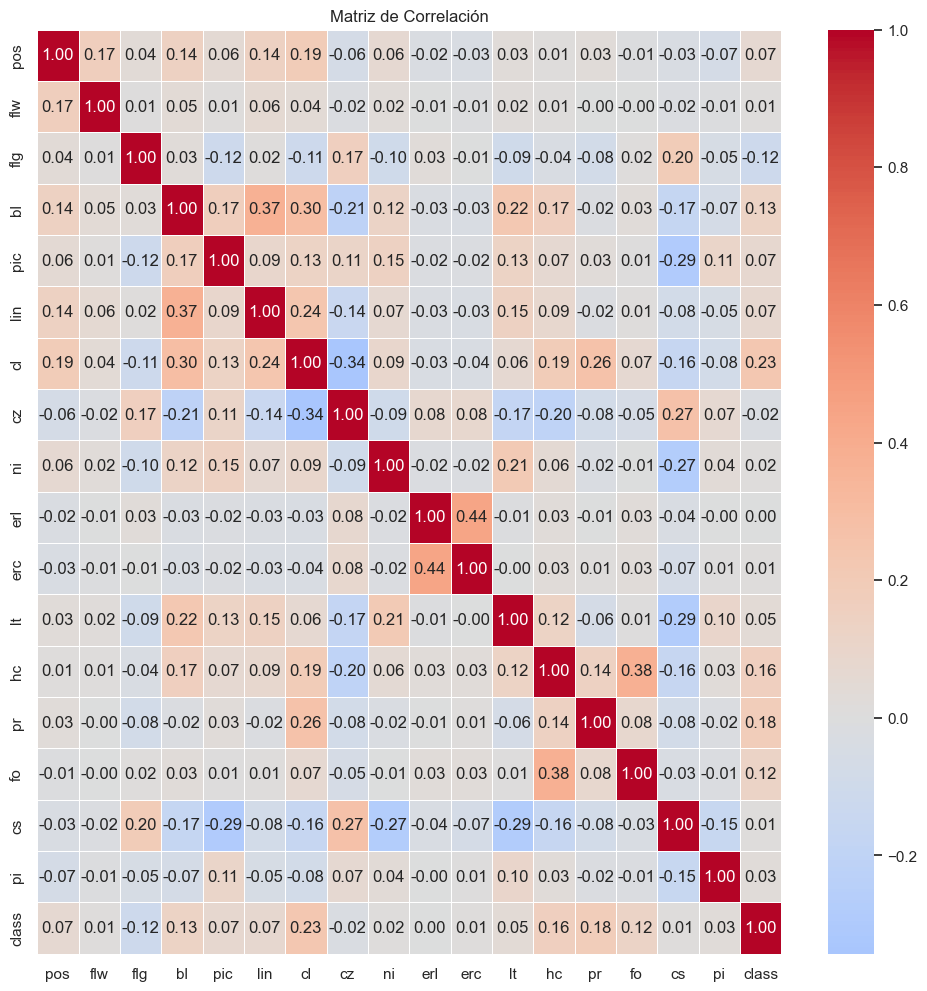

In [90]:

# Crear la matriz de correlación
corr_matrix = df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 12))

# Crear un mapa de calor con la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")

# Añadir el título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

<Axes: >

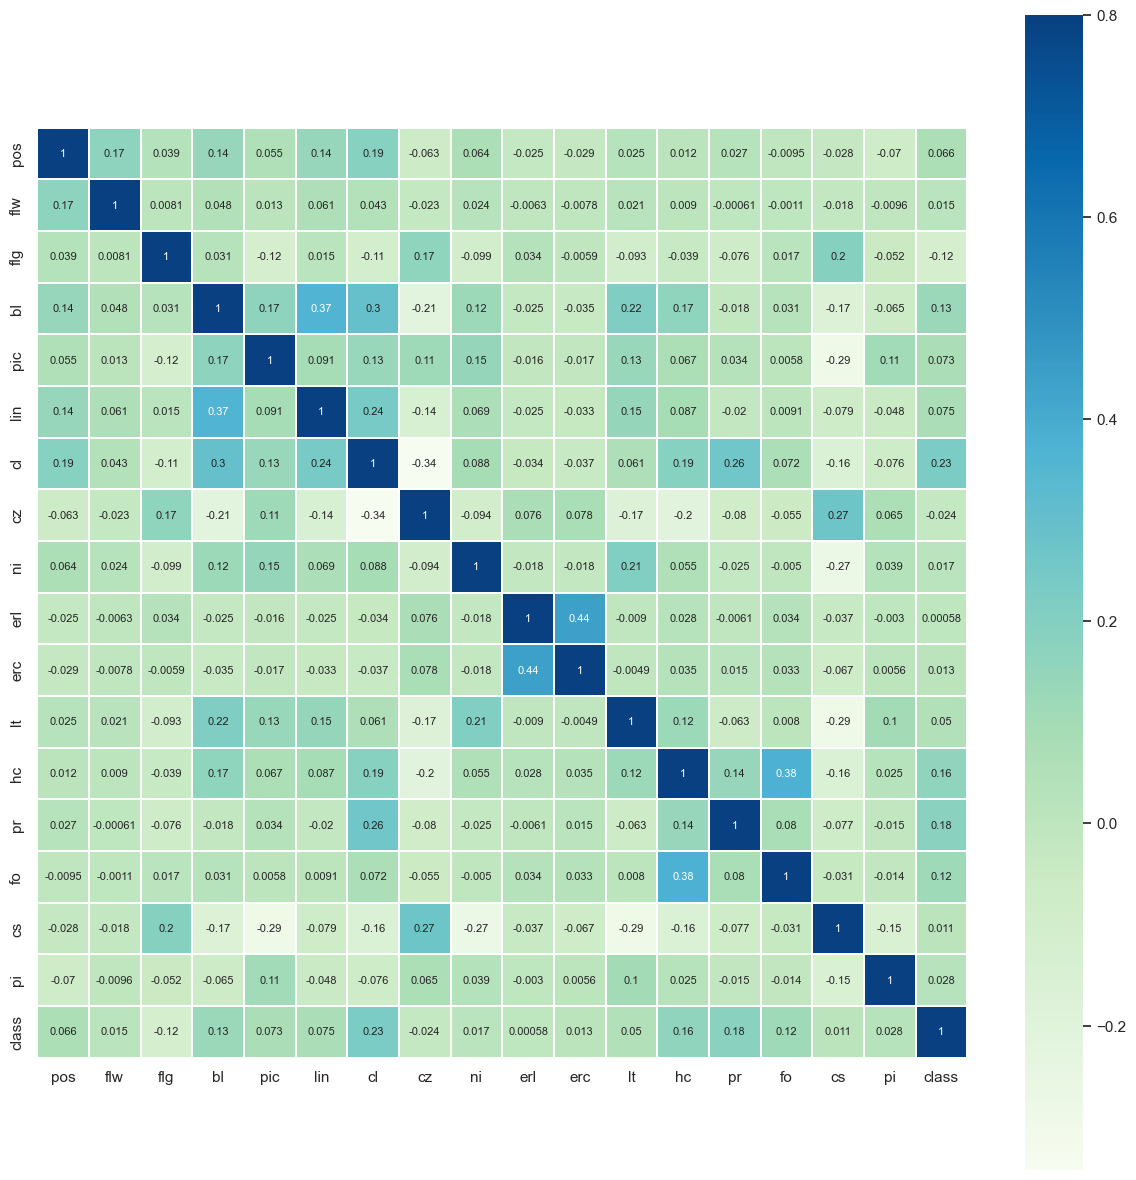

In [91]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
            linewidths=0.25,
            vmax=0.8,square=True,
            cmap="GnBu",annot=True,
            annot_kws={"size":8})

## Modelo de regresion logistica

In [92]:
# Vamos a crear una función para discretizar todas las columnas
def discretizar_columnas(df, bins=4):
    df_discreto = df.copy()  # Crear una copia del DataFrame original
    for col in df.columns:
        # Para cada columna, discretizamos en "bins" intervalos
        df_discreto[col] = pd.cut(df[col], bins=bins, labels=[f'Grupo_{i+1}' for i in range(bins)])
    return df_discreto

df_discret = discretizar_columnas(df_normalized)

In [109]:

# Supongamos que df_discret es el DataFrame discretizado que tienes
# Definir las variables independientes (X) y la dependiente (y)
X = df_discret.drop(columns=['class'])
y = df_discret['class']

# Aplicar One-Hot Encoding a las variables independientes
X = pd.get_dummies(X)

# Aplicar Label Encoding a la variable dependiente
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalar los datos
scaler = StandardScaler()

# Escalar los datos manteniendo los nombres de las columnas
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=300)

# Entrenar el modelo con los datos escalados
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Mostrar la precisión
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.5843915954744863


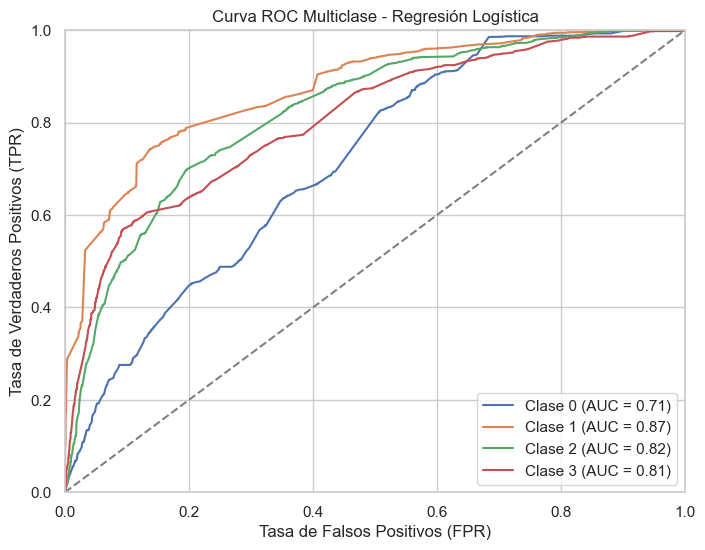

In [110]:
# Binarizar las clases (One-vs-Rest)
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Predecir las probabilidades en el conjunto de prueba
y_prob = model.predict_proba(X_test)

# Calcular y graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))

for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {auc:.2f})')

# Configuraciones del gráfico
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Multiclase - Regresión Logística')
plt.legend(loc="lower right")
plt.show()

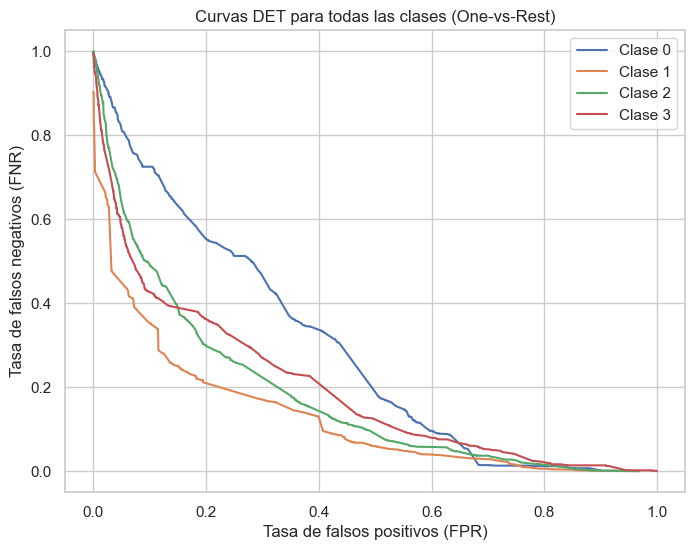

In [114]:
# Crear el gráfico para todas las clases
plt.figure(figsize=(8, 6))

# Para cada clase, crear una curva DET (One-vs-Rest)
for i in range(y_prob.shape[1]):
    # Convertir el problema multiclase en binario (clase i vs el resto)
    y_binary = (y_test == i).astype(int)
    y_prob_binary = y_prob[:, i]

    # Obtener la curva DET
    fpr, fnr, thresholds = det_curve(y_binary, y_prob_binary)

    # Graficar la curva DET para cada clase
    plt.plot(fpr, fnr, label=f'Clase {i}')

# Configuración del gráfico
plt.title('Curvas DET para todas las clases (One-vs-Rest)')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de falsos negativos (FNR)')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## Modelo de regresion lineal

In [95]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = df_normalized.drop(columns=['class'])  # Variables independientes
y = df_normalized['class']  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Mostrar el coeficiente de determinación R^2 y el MSE
r2 = model.score(X_test, y_test)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")


Error cuadrático medio (MSE): 0.12394797284654813
Coeficiente de determinación (R²): 0.1178840159619785


# :C

## Kmeans

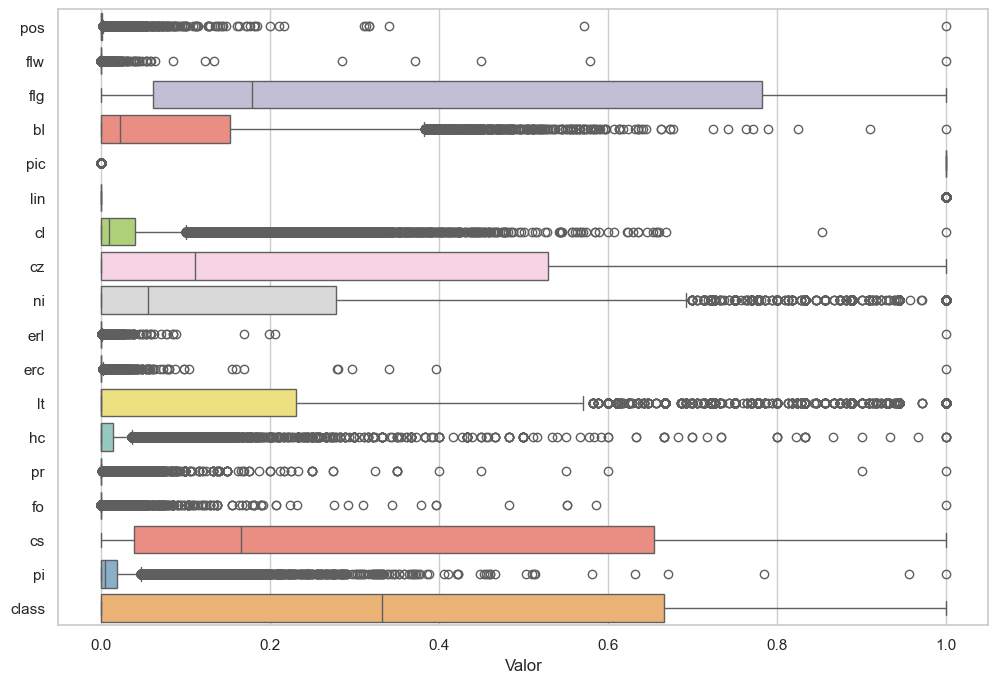

In [100]:
# Crear diagramas de caja para las características filtradas
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_normalized, orient='h',
            palette='Set3')
plt.xlabel('Valor')

plt.show()

In [101]:

col = df_normalized.columns[:]
for i in col:
  q1 = df[i].quantile(0.01)
  q4 = df[i].quantile(0.99)
  df_normalized[i][df_normalized[i]<=q1] = q1
  df_normalized[i][df_normalized[i]>=q4] = q4

C:\Users\Eddy.Arias\AppData\Local\Temp\ipykernel_18376\72791031.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_normalized[i][df_normalized[i]<=q1] = q1
C:\Users\Eddy.Arias\AppData\Local\Temp\ipykernel_18376\72791031.py:6: FutureWarni

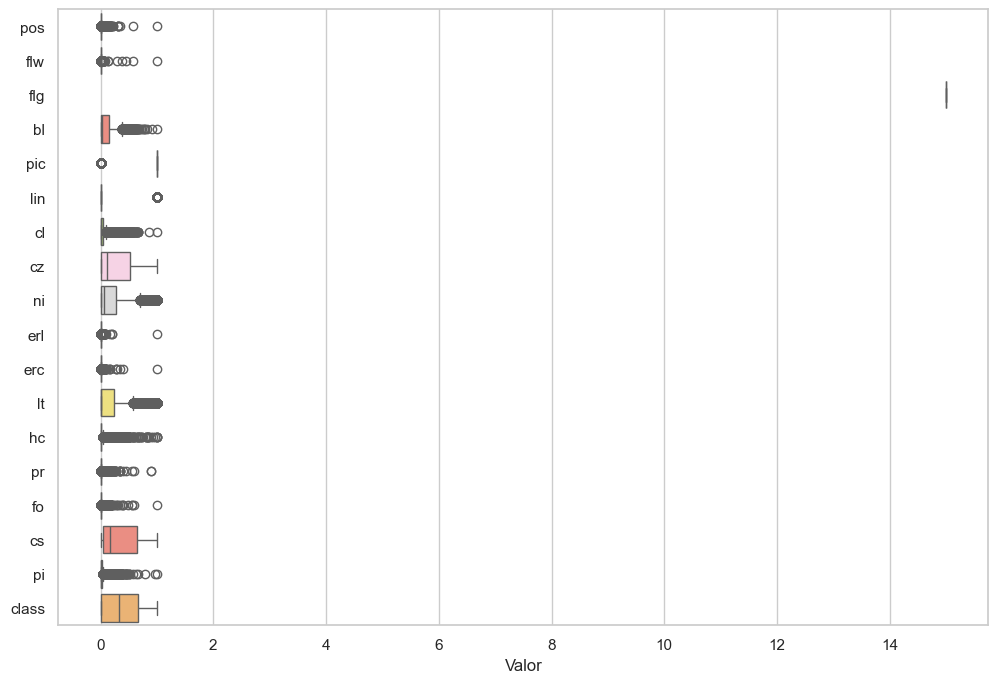

In [102]:
# Crear diagramas de caja para las características filtradas
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_normalized, orient='h',
            palette='Set3')
plt.xlabel('Valor')

plt.show()

In [107]:
class KMeans:
    def __init__(self, n_clusters=2, max_iters = 30, tol= 1e-4):
        self.n_clusters = n_clusters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.max_iters= max_iters

    def fit(self, X):
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[idx]

        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis = 1)
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

            if np.all(np.abs(new_centroids-self.centroids) <self.tol):
                break

            self.centroids = new_centroids
    
    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis = 1)

# Definir las variables independientes (X) y dependiente (y)
X = df_normalized.drop(columns=['class'])
y_true = df_normalized['class']  # Variable dependiente

# Asegurarse de que y_true sea discreto (valores categóricos transformados a enteros)
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(y_true)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar KMeans
kmeans = KMeans(n_clusters=4)  # Número de clusters que estimas
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

# Relabel los clusters para alinearlos con las clases reales
def relabel_clusters(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    # Encontrar el mapeo entre clusters y clases verdaderas
    relabeling = np.argmax(cm, axis=1)
    new_predicted_labels = np.array([relabeling[label] for label in predicted_labels])
    return new_predicted_labels

# Reasignar etiquetas a los clusters
y_pred = relabel_clusters(true_labels=y_true, predicted_labels=y_pred)

# Revisar la distribución de las clases
print("Distribución de clases en y_true:")
print(pd.Series(y_true).value_counts())

print("Distribución de clases en y_pred:")
print(pd.Series(y_pred).value_counts())

# Generar el informe de clasificación (sin advertencias)
report = classification_report(y_true=y_true, y_pred=y_pred, zero_division=0)
print(report)

Distribución de clases en y_true:
0    12054
1    10549
2    10441
3    10263
Name: count, dtype: int64
Distribución de clases en y_pred:
1    22714
2    20593
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12054
           1       0.39      0.84      0.54     10549
           2       0.32      0.63      0.42     10441
           3       0.00      0.00      0.00     10263

    accuracy                           0.36     43307
   macro avg       0.18      0.37      0.24     43307
weighted avg       0.17      0.36      0.23     43307



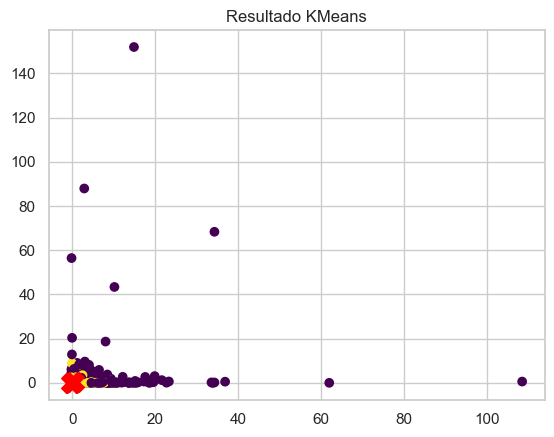

In [108]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap="viridis")
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c="red", marker="X")
plt.title("Resultado KMeans")
plt.show()
